### **Rebecca** **Dsouza** | **Roll No 56** | **Batch D** | **Group 2**

# **Circle Detection in OCR by Hough Transform**

### **Introduction**

The Hough transform in its simplest form is a method to detect straight lines but it can also be used to detect circles or ellipses. The algorithm assumes that the edge is detected and it is robust against noise or missing points.


<img src="https://lh3.googleusercontent.com/5I6IWUSrVAqKibGltRW8sLuP_OOO5JmJlQ2nXxR3cVRPtnQKUZGXkYs12JEvzXIAmlziP1_ptgbwsOuoDbPCW8DvRPbesAq3pOmocWiN3s-88YeQkygjfgptg8u7HVVbAKfvg3SjM0kuzC64uh6VsdbLP1DAbEJQyfVNR6Lw8jqcLQLct79O177Xe_-QC74gPyZM2TqU4IqhUZF_GfKK0B42CtWuR-hrQczhM-EUyEGHxOINnVWs0wUp-lyfGJTim2ZKBhhIQGbGsfIH1sjp9sAwbkUcc8oTMzaVbAwGBCWZXX3tWXWzSKmZPpfGJpeYLGKN8qeyYgzl4zsFz1ZdoC9EIJHNrEMKm29YvCmK0xpN-V6ZdqfwPg_My7ijVmyDhZo5FCVXTFzrgk3RZn9E3YpkjrgvF0ImlPwWef8SGl_HNOttvzjUyRRqsKkhpw5I2dJms8ObczrwTYwFTKZ-96bFvYnWlyEp-6VaYY7sWe6CNZiHTUsWDmPepo-o3MKVH5p0cPgZsgE1-kPbMaS5Y4eLzK6xuPZmC4dYF1-agH-tIPCeNQu11A2ebYxkLumBECzA7j0OnosOHJJ9MJoLKdD7kXSFBn6_LSmBfZ7U_D78fqAgvnclbgdhfxf9iQbS-yxWy-WDJWBeOUZiP7Mx4pgOL6oSlWImZOtSvSsckWbOu_G1SKHGL4Xe=w320-h240-no"/>

### **Mathematics**
A circle can be described completely with three pieces of information: the center (a, b) and the radius. (The center consists of two parts, hence a total of three)

```
x = a + Rcosθ
y = b + Rsinθ

```

When the θ varies from 0 to 360, a complete circle of radius R is generated.

So with the Circle Hough Transform, we expect to find triplets of (x, y, R) that are highly probably circles in the image. That is, we want to find three parameters. Thus, the parameter space is 3D.

If different values of R are tried, every point in the xy space will be equivalent to a circle in the ab space (R isn't a parameter, we already know it). This is because on rearranging the equations, we get:

```
a = x1 - Rcosθ
b = y1 - Rsinθ
```

for a particular point (x1, y1). And θ sweeps from 0 to 360 degrees.


### **Algorithmic Steps** 


*   Load an image
*   Detect edges and generate a binary image
*   For every 'edge' pixel, generate a circle in the ab space
*   For every point on the circle in the ab space, cast 'votes' in the accumulator cells
*   The cells with greater number of votes are the centers

# **Uploading Image from Desktop**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ip.png to ip.png


# **Importing Numpy, Scikit Image and Open-CV**

In [0]:
import numpy as np

from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter

from cv2 import imread
from google.colab.patches import cv2_imshow

# **Reading Image in Binary Form**

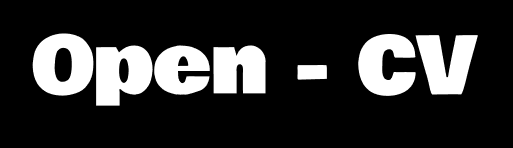

In [3]:
image = imread('ip.png', 0)
cv2_imshow(image)

# **Applying Canny Edge Detection to Binary Image**

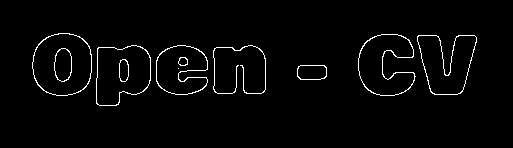

In [4]:
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)
cv2_imshow(np.where(edges.astype(int)==1, 255, edges.astype(int)))

# **Computing Hough Circles on Edge Detected Image**

In [0]:
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=5)

# **Plotting Hough Circles on Image**

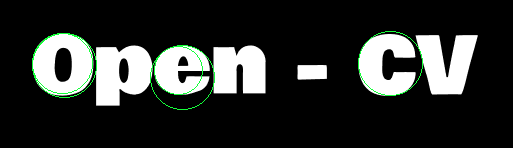

In [6]:
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[circy, circx] = (57, 255, 20)

cv2_imshow(image)